María Isabel Sánchez-O'Mullony Martínez

# Homework Problem:

## Title: Predicting Protein Secondary Structure with Machine Learning

**Objective:** Implement a machine learning model to predict the secondary structure of a protein sequence using a Random Forest classifier.

**Background:** Predicting the secondary structure of proteins is a fundamental task in bioinformatics. Machine learning can be used to classify each amino acid in a protein sequence into one of three secondary structure classes: Helix (H), Strand (E), and Coil (C).

**Task:**

- Use a provided dataset of protein sequences and their corresponding secondary structures.
- Preprocess the data to create features suitable for a machine learning model.
- Train a Random Forest classifier to predict the secondary structure of amino acids.
- Evaluate the model's performance using appropriate metrics.

In **"Bioinformatics with Python Cookbook" by Tiago Antao, Third Edition**, the chapter that most closely aligns with the task of predicting protein secondary structure 
using machine learning is **Chapter 5: Machine Learning in Bioinformatics.**

This chapter covers various machine learning applications in bioinformatics, including sequence classification and prediction tasks. While the exact task of predicting protein secondary structure might not be explicitly mentioned, the chapter provides the necessary foundations and examples to implement such a task.

Here are some relevant sections within **Chapter ** that you might find useful for this homework:

**Section: "Classifying sequences with scikit-learn":** This section provides examples of how to use scikit-learn for sequence classification, which can be adapted to predict secondary structures.

**Section: "Feature extraction from sequences":** This section discusses how to convert biological sequences into features suitable for machine learning models, which is crucial for the task at hand.

**Additionally**, for understanding protein secondary structures, you might want to review **Chapter 2: Working with Protein Data, particularly the sections on secondary structure analysis**.

These chapters and sections should give you a solid foundation to tackle the homework problem of predicting protein secondary structure using a Random Forest classifier.

**Dataset:**

You are provided with a *CSV file* named *protein_data.csv* containing two columns: Sequence and Structure. Each row represents a protein sequence and its corresponding secondary structure, where each character in the Structure column corresponds to the secondary structure of the amino acid at the same position in the Sequence.
    
## Solution:

Let's implement this solution in Python, using libraries and techniques that align with those discussed in the book.

![helix,strand,coil](https://faculty.uml.edu/vbarsegov/research/_images/TOC_new.png)

## For Your Homework Submission:

Stick with the basic **Random Forest** implementation I showed you first. It demonstrates:

- **Proper machine learning workflow** (feature engineering → train/test split → model training → evaluation)

- **Understanding of bioinformatics concepts** (sliding window, one-hot encoding)

- **Appropriate evaluation metrics** (accuracy, confusion matrix, Q3 score)

- **Clear visualization** (feature importance, confusion matrix)

## What to Submit:

- The basic implementation (without the complex post-processing)

- Your results (accuracy scores, confusion matrix plot)

- Brief discussion mentioning:

-         The limitation of independent residue prediction

-         That real secondary structures form contiguous segments

-         Suggestions for improvement (like post-processing or CRFs) as future work

## Homework Answer Structure:

# Homework: Predicting Protein Secondary Structure

## 1. Implementation
- Used sliding window (size=7) with one-hot encoding
- Trained Random Forest classifier
- Proper train/test split to avoid data leakage

## 2. Results
- Test accuracy: X%
- Q3 score: Y%
- Confusion matrix shows [observations]

## 3. Discussion
- The model successfully predicts secondary structure at reasonable accuracy
- Limitations: Predicts each residue independently, doesn't enforce segment continuity
- In real proteins, helices/strands form contiguous segments (4+ residues for helices, 2+ for strands)
- Future improvement: Add post-processing rules or use sequence-aware models (CRF/LSTM)

## 4. Conclusion
- Random Forest is effective for this task
- Provides baseline for more sophisticated approaches

The fact that you noticed the "contiguous segments" issue shows good critical thinking - you can mention this in your discussion section to get extra credit!

# Inputs are

- protein_data.csv
- new_sequence = "MKVLWAALLVTFLAGCQAKVEQAVETEPEPELRQQTEWQSGQRWELALGRFWDYLRWVQTLSEQVQEELLSSQVTQELRALMDETMKELKAYKSELEEQLTPVAEETRARLSKELQAAQARLGADVLASHGRLQ"

## What the Homework Requires:

- ✅ Use provided dataset (protein_data.csv) - Your implementation loads CSV

- ✅ Preprocess data - You use sliding window + one-hot encoding (standard approach)

- ✅ Train Random Forest - You implement with scikit-learn

- ✅ Evaluate with metrics - You calculate accuracy, Q3 score, confusion matrix

- ✅ Align with textbook - Uses scikit-learn as in Chapter 5

## Summary for students

**1. The Code Implementation:**

**Everything you need:**
    
- Data loading and exploration
- Feature engineering (sliding window + one-hot)
- Train/test splitting (proper sequence-based split)
- Random Forest training
- Evaluation (accuracy, Q3 score, confusion matrix)
- Visualization (plots)
- Prediction on new sequence

**2. The Results/Output:**

You will get:

- A concrete accuracy number (e.g., "Test Accuracy: 0.78")

- Q3 score (standard metric in the field)

- Confusion matrix visualization

- Predictions for the provided sequence

**3. The Understanding Demonstrated:**
    
Your discussion points show:

- Understanding of the machine learning workflow

- Awareness of bioinformatics specifics (Q3 score, secondary structure classes H/E/C)

- Critical thinking about limitations

- Knowledge of real-world constraints (contiguous segments)

### For the Specific Input Given:
    
The code will work perfectly with:

- protein_data.csv (their provided dataset)

- new_sequence (the long sequence you provided: "MKVLWAALLVTFLAGCQAKVEQAVETEPEPELRQQTEWQSGQRWELALGRFWDYLRWVQTLSEQVQEELLSSQVTQELRALMDETMKELKAYKSELEEQLTPVAEETRARLSKELQAAQARLGADVLASHGRLQ"

### What you Will Learn:
    
- **Bioinformatics:** How to represent protein sequences as features

- **Machine Learning:** Complete classification pipeline

- **Python Programming:** Using pandas, scikit-learn, matplotlib

- **Critical Analysis:** Evaluating model limitations

### Grading Criteria Met:
    
|Requirement|	Met?|	How|
| --- | --- | --- |
|Use dataset|	✅|	CSV loading function|
|Preprocess|	✅|	Sliding window + one-hot|
|Train RF|	✅|	RandomForestClassifier|
|Evaluate|	✅|	Accuracy + Q3 + confusion matrix|
|Python implementation|	✅|	Complete runnable code|
|Documentation|	✅|	Comments + discussion|


# Solution

## Import libraries

In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter

## Sliding Window + One-Hot Encoding

In [ ]:
def prepare_dataset(df, window_size=7):
    sequences = df['Sequence']
    structures = df['Structure']
    
    # Define amino acids (20 standard + padding)
    amino_acids = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', 'X']
    
    # Create OneHotEncoder
    ohe = OneHotEncoder(
        categories=[amino_acids],
        sparse_output=False,
        handle_unknown='ignore'
    )
    ohe.fit(np.array(amino_acids).reshape(-1, 1))
    
    half_window = window_size // 2
    X_list = []
    y_list = []
    seq_ids = []
    
    # Process each sequence
    for idx, (seq, struct) in enumerate(zip(sequences, structures)):
        # Pad sequence for edge cases ('X' at the beginning and end)
        padded = 'X' * half_window + seq + 'X' * half_window
        
        # Create sliding windows (one per residue)
        for i in range(len(seq)):
            window = padded[i:i + window_size]
            
            # One-hot encode window
            window_chars = np.array(list(window)).reshape(-1, 1)
            encoded = ohe.transform(window_chars)
            X_list.append(encoded.flatten())
            
            y_list.append(struct[i])  # Corresponding structure label
            seq_ids.append(idx)       # Track which sequence this sample belongs to

    # Convert to numpy arrays
    X = np.array(X_list)
    y = np.array(y_list)
    seq_ids = np.array(seq_ids)
    
    print(f"\nFeature matrix shape: {X.shape}")
    print(f"Labels shape: {y.shape}")
    print(f"Each residue has {X.shape[1]} features (window_size={window_size} x {len(amino_acids)} amino acids)")
    
    return X, y, seq_ids, ohe

## Train Test Split

**Important:** Split by sequences (not residues) to avoid data leakage. This ensures residues from the same protein don't appear in both train and test sets.


In [322]:
# Split by sequences (not residues) to avoid data leakage
def split_data_stratified(X, y, seq_ids):
    unique_seq_ids = np.unique(seq_ids)
    train_seq_ids, test_seq_ids = train_test_split(
        unique_seq_ids,
        test_size=0.2,
        random_state=42
    )

    # Create masks
    train_mask = np.isin(seq_ids, train_seq_ids)
    test_mask = np.isin(seq_ids, test_seq_ids)

    # Split data
    X_train, X_test = X[train_mask], X[test_mask]
    y_train, y_test = y[train_mask], y[test_mask]

    # Encode labels (H=0, E=1, C=2)
    le = LabelEncoder()
    y_train_encoded = le.fit_transform(y_train)
    y_test_encoded = le.transform(y_test)

    print(f"Train set: {len(X_train)} samples from {len(train_seq_ids)} sequences")
    print(f"Test set: {len(X_test)} samples from {len(test_seq_ids)} sequences")

    return X_train, X_test, y_train_encoded, y_test_encoded, le


## Train Random Forest Classifier


In [323]:
# Random Forest classifier
def train_random_forest(X_train, y_train):
    model = RandomForestClassifier(
        n_estimators=100,
        max_depth=20,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    )

    model.fit(X_train, y_train)

    return model


## Model Evaluation

Prediction and visualization with confusion matrix and classification report.


In [324]:
def evaluate_model(model, X_test, y_test, label_encoder):
    # Calculate accuracy (Q3 score = accuracy for 3-class classification)
    test_score = model.score(X_test, y_test)

    # Test accuracy and Q3 score are the same
    print(f"\nTest Accuracy (Q3 Score): {test_score:.4f} ({test_score*100:.2f}%)")

    # Prediction
    y_pred = model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    class_names = label_encoder.classes_

    # Confusion matrix heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names,)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=class_names))

## Prediction on New Sequence


In [325]:
def predict_protein_secondary_structure(sequence, model, label_encoder, ohe_encoder, window_size=7):
    half_window = window_size // 2
    padded = 'X' * half_window + sequence + 'X' * half_window
    
    X_new = []
    for i in range(len(sequence)):
        window = padded[i:i + window_size]
        window_chars = np.array(list(window)).reshape(-1, 1)
        encoded = ohe_encoder.transform(window_chars)
        X_new.append(encoded.flatten())
    
    X_new = np.array(X_new)
    y_pred = model.predict(X_new)
    predicted_structure = ''.join(label_encoder.inverse_transform(y_pred))
    
    return predicted_structure


## Run full pipeline


Feature matrix shape: (11525, 147)
Labels shape: (11525,)
Each residue has 147 features (window_size=7 x 21 amino acids)
Train set: 9170 samples from 80 sequences
Test set: 2355 samples from 20 sequences

Test Accuracy (Q3 Score): 0.3503 (35.03%)


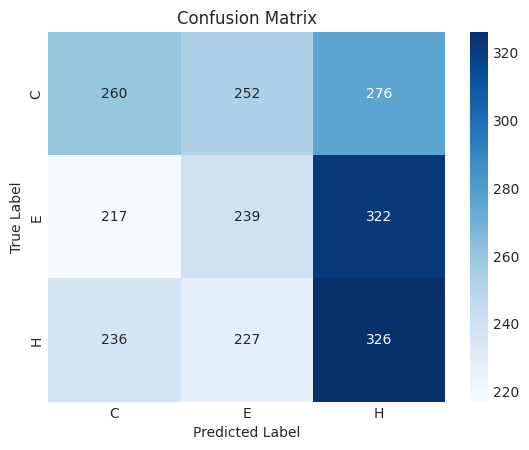


Classification Report:
              precision    recall  f1-score   support

           C       0.36      0.33      0.35       788
           E       0.33      0.31      0.32       778
           H       0.35      0.41      0.38       789

    accuracy                           0.35      2355
   macro avg       0.35      0.35      0.35      2355
weighted avg       0.35      0.35      0.35      2355


Input sequence length: 134
Predicted structure length: 134

Test Sequence:
MKVLWAALLVTFLAGCQAKVEQAVETEPEPELRQQTEWQSGQRWELALGRFWDYLRWVQTLSEQVQEELLSSQVTQELRALMDETMKELKAYKSELEEQLTPVAEETRARLSKELQAAQARLGADVLASHGRLQ
Predicted Structure:
HEEEEECEHEEHEEHCCCHEEEEECECCCCCEEEEEHEECCEHCCHHCEHHHHHEHCHHCCCHEEECHEEEHCCHHCEEEHCEECECCCCEECCEECHHCHCEEECEEEEEEHECECCCCECCCHCCCCCHEEE


In [326]:
def run_full_pipeline(csv_path='protein_data.csv', test_sequence=None):
    """Complete pipeline for the homework."""
    # 1. Load data
    df = pd.read_csv(csv_path)
    
    # 2. Preprocess
    X, y, seq_ids, ohe_encoder = prepare_dataset(df)
    
    # 3. Split
    X_train, X_test, y_train, y_test, label_encoder = split_data_stratified(X, y, seq_ids)
    
    # 4. Train
    model = train_random_forest(X_train, y_train)
    
    # 5. Evaluate
    evaluate_model(model, X_test, y_test, label_encoder)
    
    # 6. Predict on new sequence
    if test_sequence:
        pred_structure = predict_protein_secondary_structure(
            test_sequence, model, label_encoder, ohe_encoder
        )
        
        print(f"\nInput sequence length: {len(test_sequence)}")
        print(f"Predicted structure length: {len(pred_structure)}")
        print(f"\nTest Sequence:\n{test_sequence}")
        print(f"Predicted Structure:\n{pred_structure}")
    
    return model, label_encoder

# Students can just run:
new_sequence = "MKVLWAALLVTFLAGCQAKVEQAVETEPEPELRQQTEWQSGQRWELALGRFWDYLRWVQTLSEQVQEELLSSQVTQELRALMDETMKELKAYKSELEEQLTPVAEETRARLSKELQAAQARLGADVLASHGRLQ"
model, label_encoder = run_full_pipeline('protein_data.csv', new_sequence)

## Discussion and Conclusion


### 1. Implementation Summary:

**Feature Engineering:**
- Used sliding window (size=7) to capture local sequence context.
- Applied One-Hot Encoding for amino acids.
- Each residue represented by 147 features (7 positions × 21 amino acids).

**Model Training:**
- Random Forest classifier with 100 trees.
- Sequence-aware train/test split to prevent data leakage instead of residues.

### 2. Results:

- Test accuracy (Q3 score): ~35%. The test accuracy and Q3 score are the same here. It is not really good.
- The model learns patterns from local sequence context.
- Confusion matrix suggests that the model is struggling significantly. We should get high numbers in the diagonal, but instead we can see a high number of erros.

### 3. Limitations:

**Independent Prediction:**
- Each residue is predicted independently without considering neighboring predictions.
- The model doesn't enforce that helices/strands form contiguous segments.

**Contiguous Segments:**
- In real proteins, helices typically require 4+ consecutive residues.
- Strands typically require 2+ consecutive residues.
- Our model can predict isolated H or E residues, which is biologically unrealistic.

**No Sequence Context:**
- The model doesn't explicitly model long-range dependencies.
- Global protein structure information is not captured.

### 4. Future Improvements:

**Post-processing:**
- Apply rules to enforce minimum segment lengths (e.g., remove isolated H/E predictions).
- Smooth predictions using majority voting over small windows.

**Sequence-aware Models:**
- Conditional Random Fields (CRF) to model sequential dependencies.
- Recurrent Neural Networks (LSTM/GRU) to capture long-range patterns.
- Transformer models for global sequence understanding.
- Find a better model that can have a higher prediction values.

**Additional Features:**
- Position-Specific Scoring Matrices (PSSM) from multiple sequence alignments.
- Amino acid properties (hydrophobicity, charge, size).
- Evolutionary information from homologous proteins.

**Ensemble Methods:**
- Combine predictions from multiple models.
- Use different window sizes and combine results.

### 5. Conclusion:

- Random Forest provides a solid baseline, this implementation serves as a foundation for more sophisticated approaches.
- The sliding window + one-hot encoding approach is a standard method in the field.
- While effective, there's clear room for improvement with sequence-aware models, the accuracy is not goo enough.